In [2]:
# https://www.youtube.com/watch?v=i-HNJZeOOMY
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [48]:
# Helpers
from sklearn.preprocessing import MinMaxScaler  


In [3]:
df= pd.read_csv("./Demo_sales_data.csv")

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2021,11/11/2021,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.91
1,2,CA-2016-152156,08/11/2021,11/11/2021,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.58
2,3,CA-2016-138688,12/06/2021,16/06/2021,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.87
3,14,CA-2016-161389,05/12/2021,10/12/2021,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,98103,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.98,3,0.2,132.59
4,22,CA-2016-137330,09/12/2021,13/12/2021,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,...,68025,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.46,7,0.0,5.06


In [5]:
df_reduced = df[["Customer ID", "Segment", "Order ID", "Order Date", "Sales", "Quantity"]]

In [6]:
df_reduced.head()

,Customer ID,Segment,Order ID,Order Date,Sales,Quantity
0,CG-12520,Consumer,CA-2016-152156,08/11/2021,261.96,2
1,CG-12520,Consumer,CA-2016-152156,08/11/2021,731.94,3
2,DV-13045,Corporate,CA-2016-138688,12/06/2021,14.62,2
3,IM-15070,Consumer,CA-2016-161389,05/12/2021,407.98,3
4,KB-16585,Corporate,CA-2016-137330,09/12/2021,19.46,7


In [54]:
df_pivot = pd.pivot_table(
    df_reduced, 
    values=['Order Date', 'Quantity', 'Sales', 'Order ID'], 
    index="Customer ID",
    aggfunc={'Order Date': 'max', 'Quantity': 'sum', 'Sales': 'mean', 'Order ID': 'count'}
)

df_pivot['Order Date'] = pd.to_datetime(df_pivot['Order Date'])  
df_pivot.columns = ['Latest Order Date', 'Number of Orders', 'Total Items', 'Average Sales']
# 'Latest Order Date' > Recency
# 'Number of Orders' > Frequency
# 'Average Sales' > Monetary

# df_pivot = pd.pivot_table(df_reduced, values='Customer ID', index=['Segment'], columns=['Order ID'], aggfunc="sum", fill_value=0)
df_pivot = df_pivot.reset_index()  
df_pivot.head()

/var/folders/x_/0z24g8110_n09vlvhxmrh0_w0000gp/T/ipykernel_14528/2905099131.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_pivot['Order Date'] = pd.to_datetime(df_pivot['Order Date'])


,Customer ID,Latest Order Date,Number of Orders,Total Items,Average Sales
0,AA-10315,2021-03-03,4,14,1101.51750
1,AA-10375,2021-11-14,4,7,132.57250
2,AA-10480,2021-08-26,10,31,174.75000
3,AA-10645,2021-04-09,8,32,208.52375
4,AB-10015,2021-10-11,2,4,281.97000


In [55]:
df[df['Customer ID'] == "AA-10375"]["Order Date"]

180   2021-10-07
654   2021-11-14
655   2021-11-14
656   2021-11-14
Name: Order Date, dtype: datetime64[ns]

In [56]:
for col in ['Latest Order Date', 'Number of Orders', 'Total Items', 'Average Sales']:  
    # Calculate the percentrank for each column and store it in a new column  
    df_pivot[f'{col}_Percentrank'] = df_pivot[col].rank().div(len(df_pivot)).mul(10)

In [57]:
df_pivot.head()

,Customer ID,Latest Order Date,Number of Orders,Total Items,Average Sales,Latest Order Date_Percentrank,Number of Orders_Percentrank,Total Items_Percentrank,Average Sales_Percentrank
0,AA-10315,2021-03-03,4,14,1101.51750,0.822884,6.199060,5.799373,9.764890
1,AA-10375,2021-11-14,4,7,132.57250,7.946708,6.199060,2.938871,5.078370
2,AA-10480,2021-08-26,10,31,174.75000,4.992163,9.451411,8.816614,6.206897
3,AA-10645,2021-04-09,8,32,208.52375,1.481191,8.863636,8.918495,6.598746
4,AB-10015,2021-10-11,2,4,281.97000,6.708464,3.017241,1.504702,7.664577


In [58]:
latest_order = df_pivot.sort_values(by='Latest Order Date', ascending=False).head(1)["Latest Order Date"].values[0]
latest_order

numpy.datetime64('2021-12-31T00:00:00.000000000')

In [59]:
df_pivot["Days since order"] = (latest_order - df_pivot["Latest Order Date"]).dt.days

In [60]:
df_pivot.head()

,Customer ID,Latest Order Date,Number of Orders,Total Items,Average Sales,Latest Order Date_Percentrank,Number of Orders_Percentrank,Total Items_Percentrank,Average Sales_Percentrank,Days since order
0,AA-10315,2021-03-03,4,14,1101.51750,0.822884,6.199060,5.799373,9.764890,303
1,AA-10375,2021-11-14,4,7,132.57250,7.946708,6.199060,2.938871,5.078370,47
2,AA-10480,2021-08-26,10,31,174.75000,4.992163,9.451411,8.816614,6.206897,127
3,AA-10645,2021-04-09,8,32,208.52375,1.481191,8.863636,8.918495,6.598746,266
4,AB-10015,2021-10-11,2,4,281.97000,6.708464,3.017241,1.504702,7.664577,81


In [90]:
scaler = MinMaxScaler()
df_test = df_pivot.copy()
df_test.drop(columns=['Customer ID',"Latest Order Date"], inplace=True)
normalized_df = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)  


In [62]:
normalized_df.head()

,Number of Orders,Total Items,Average Sales,Latest Order Date_Percentrank,Number of Orders_Percentrank,Total Items_Percentrank,Average Sales_Percentrank,Days since order
0,0.15,0.146067,0.317241,0.081102,0.573568,0.574265,0.976452,0.839335
1,0.15,0.067416,0.037684,0.796850,0.573568,0.284353,0.507064,0.130194
2,0.45,0.337079,0.049853,0.500000,0.939207,0.880064,0.620094,0.351801
3,0.35,0.348315,0.059597,0.147244,0.873128,0.890389,0.659341,0.736842
4,0.05,0.033708,0.080788,0.672441,0.215859,0.138999,0.766091,0.224377


/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/m/.pyenv/versions/3.10.12/lib

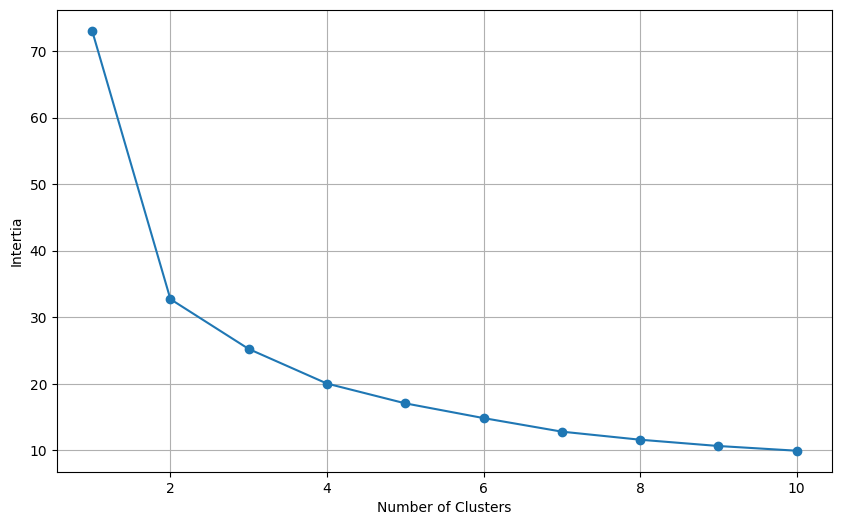

In [84]:
X1 = normalized_df.loc[:,["Total Items","Average Sales","Latest Order Date_Percentrank"]].values
# X1 = normalized_df.loc[:,["Number of Orders_Percentrank","Total Items_Percentrank","Average Sales_Percentrank"]].values
r_inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X1)
    r_inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11),r_inertia,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')
plt.show()



In [85]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X1)

# Assuming you have the KMeans centroids available  
centroids = kmeans.cluster_centers_  
labels = kmeans.labels_ 

# Create a DataFrame with the original data and labels  
data = normalized_df.loc[:,["Number of Orders_Percentrank","Total Items_Percentrank","Average Sales_Percentrank"]]  
data['Cluster'] = labels 

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [86]:
import plotly.express as px  

# Create a scatter plot with the 3D data  
fig = px.scatter_3d(  
    data,   
    x='Number of Orders_Percentrank',   
    y='Total Items_Percentrank',   
    z='Average Sales_Percentrank',   
    color='Cluster',  
    symbol='Cluster',  
    opacity=0.7  
)  

# Add the cluster centroids to the plot  
fig.add_scatter3d(  
    x=centroids[:, 0],   
    y=centroids[:, 1],   
    z=centroids[:, 2],   
    mode='markers',  
    marker=dict(  
        color='black',  
        size=10,  
        symbol='x'  
    ),  
    name='Centroids'  
)  
  
# Show the plot  
fig.show()  

In [87]:
from sklearn.decomposition import PCA  

pca = PCA(n_components=2)
df_pca = pca.fit_transform(X1)

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/m/.pyenv/versions/3.10.12/lib

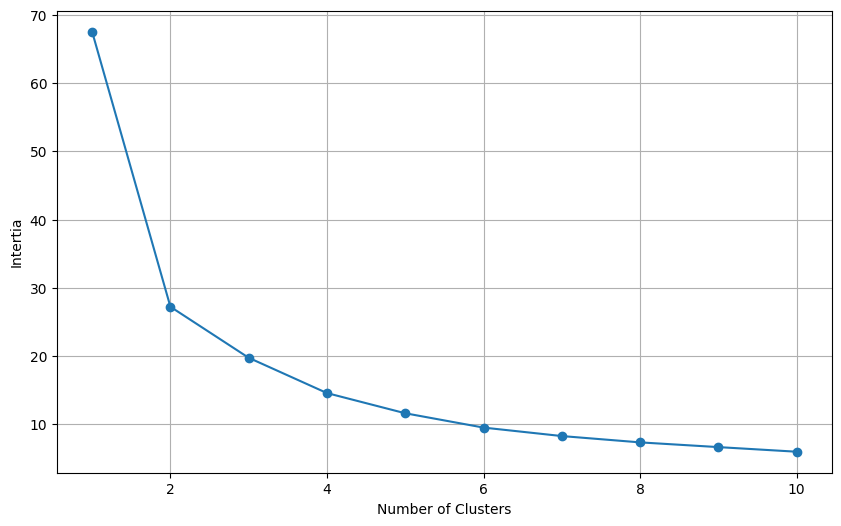

In [88]:
r_inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_pca)
    r_inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11),r_inertia,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')
plt.show()

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



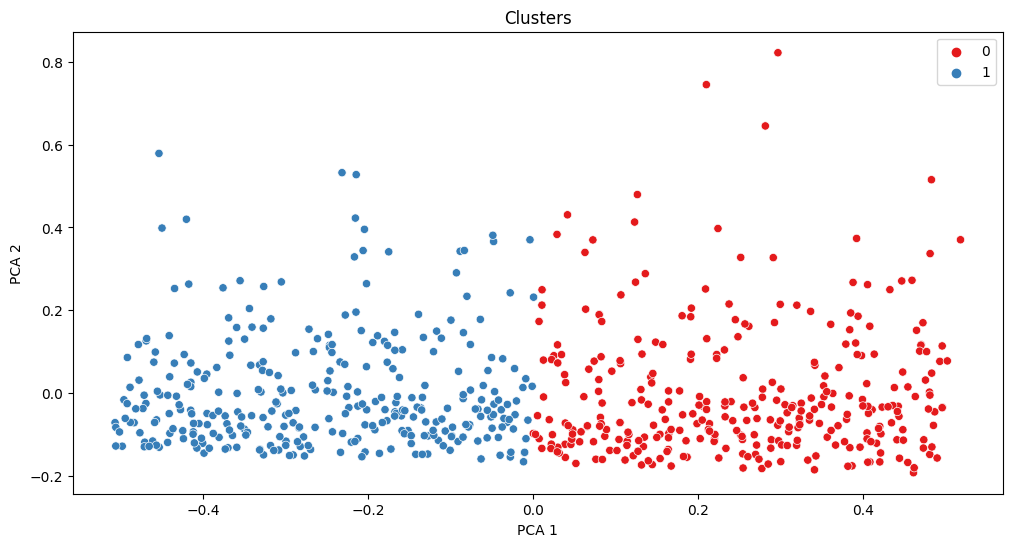

In [92]:
kmeans = KMeans(2)  # Specify the number of clusters you want to discover  
clusters = kmeans.fit_predict(df_pca)  

# Visualize the clusters using a scatter plot  
plt.figure(figsize=(12, 6))  
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters, palette='Set1')  
plt.xlabel('PCA 1')  
plt.ylabel('PCA 2')  
plt.title('Clusters')  
plt.show()